Assignment 1  
Group 18  
Ronak Gupta 23b2148  
Sanika Sachin	Wagh 21d100018

# Regularization for Robust FinTech Models


## 1. Overview  

In modern **financial technology (FinTech)**, predictive models are trained on diverse and complex data sources: stock/cryptocurrency price histories, trading volume, technical indicators, and increasingly, **textual signals from multilingual sources** such as news articles, analyst reports, and social media sentiment across global markets.  

However, minimizing the standard error function  

$
E(w) = \sum_{i=1}^N (y_i - f(\phi(x_i), w))^2
$

without constraints often leads to **overfitting**. Models may capture noise or spurious relationships (e.g., reacting strongly to irrelevant social media buzz), which reduces their ability to generalize to new market conditions.  

**Regularization** techniques, namely **L1 (Lasso)** and **L2 (Ridge)**, mitigate this issue by penalizing large parameter weights. This constrains model complexity and enhances robustness, ensuring predictions remain reliable in volatile and multilingual financial environments.  








## 2. Methodology  

### 2.1 L2 Regularization (Ridge Regression)  

$
E_{\text{ridge}}(w) = E(w) + \lambda \sum_j w_j^2
$

- Penalizes the squared magnitude of coefficients.  
- Shrinks all weights smoothly toward zero.  
- Handles correlated features (e.g., trading volume & liquidity).  
- Reduces sensitivity to noisy signals, but rarely eliminates features completely.  

### 2.2 L1 Regularization (Lasso Regression)  

$
E_{\text{lasso}}(w) = E(w) + \lambda \sum_j |w_j|
$

- Penalizes the absolute magnitude of coefficients.  
- Produces **sparse models**: some coefficients are set exactly to zero.  
- Useful for **feature selection**, especially in multilingual embeddings where many dimensions are irrelevant.  

### 2.3 Comparison  

- **Ridge:** Retains all features, useful for stability across correlated indicators.  
- **Lasso:** Selects the most predictive features, discarding irrelevant ones.  
- **Elastic Net (optional hybrid):** Combines both penalties.  

## 3. Multilingual Data Handling  

Financial markets are influenced by news and sentiment expressed in multiple languages. For example:  
- Tweets in **English**, **Chinese (Weibo)**, and **Hindi (Telegram groups)** can all impact Bitcoin prices.  
- Analyst reports and regulatory filings in local languages influence regional investor sentiment.  

To capture these effects, text is often embedded into **multilingual feature vectors** using NLP models (e.g., multilingual BERT). These vectors can be **high-dimensional** (hundreds of features).  

**Challenge:** Not all dimensions are relevant → risk of overfitting.  

**Solution:**  
- **Lasso** prunes irrelevant dimensions, automatically selecting the most informative multilingual features.  
- **Ridge** stabilizes weights across correlated signals, ensuring no single linguistic source dominates.  

## 4. FinTech Applications  

### 4.1 Cryptocurrency Price Prediction  
- Features: historical returns, volatility, volume, moving averages.  
- Additional features: sentiment embeddings from multilingual social media (Twitter, Weibo, Telegram).  
- Lasso eliminates irrelevant sentiment features; Ridge prevents instability due to correlated market indicators.  

### 4.2 Fraud Detection  
- Features: transaction logs, metadata, and multilingual chat support transcripts.  
- Lasso identifies the most predictive linguistic or transactional signals.  

### 4.3 Credit & Risk Scoring  
- Features: financial ratios + multilingual corporate filings.  
- Ridge ensures stable coefficients despite multicollinearity among ratios.

## 5. Implementation  

The experiment applies **Ridge** and **Lasso** regression to a financial dataset (cryptocurrency price prediction).  

Regularization plays a critical role in financial modeling, where datasets often contain
a large number of highly correlated or noisy features. In our case study on
cryptocurrency price prediction, the dataset included multiple financial indicators,
technical signals, and derived features.

Without regularization, the model risks overfitting to noise, leading to poor
generalization on unseen data. Ridge regression (L2) addresses this by shrinking all
coefficients toward zero, thereby stabilizing correlated features and preventing
extreme parameter values. Lasso regression (L1), on the other hand, encourages sparsity
by setting many coefficients exactly to zero. This effectively performs automatic
feature selection, keeping only the most relevant financial signals while discarding
irrelevant ones.

In multilingual FinTech contexts, such as incorporating news headlines or tweets
in multiple languages alongside numerical indicators, the feature space becomes
high-dimensional and redundant. Lasso helps eliminate uninformative features
(e.g., irrelevant linguistic signals), while Ridge ensures stability in the
presence of correlated financial indicators. Together, these methods enhance
robustness in predictive modeling for finance.

## Financial dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [24]:
# Load your dataset
df = pd.read_csv('stock_data.csv')

### The dataset contains the different indicators for predicting the price of stock such as volume, rsi, sentiment score etc

In [25]:
df

,Close,Volume,RSI,MACD,Bollinger_Upper,Bollinger_Lower,Sentiment_Score,GDP_Growth,Inflation_Rate
0,0.374780,0.298909,0.847286,0.741715,0.367146,0.366420,0.877177,0.580868,0.038604
1,0.937746,0.094805,0.494543,0.881343,0.938396,0.935640,0.907192,0.527044,0.108908
2,0.719825,0.126348,0.195471,0.463179,0.710666,0.702300,0.378363,0.351052,0.432540
3,0.599865,0.180662,0.736684,0.289076,0.593793,0.586936,0.231614,0.493274,0.946349
4,0.163410,0.203646,0.418698,0.318761,0.164158,0.156355,0.191642,0.365116,0.074867
...,...,...,...,...,...,...,...,...,...
9995,0.859975,0.622456,0.966199,0.594471,0.849929,0.840819,0.792318,0.710992,0.001473
9996,0.878667,0.226187,0.373257,0.946895,0.869530,0.880097,0.779265,0.117133,0.289775
9997,0.933110,0.749012,0.304687,0.921183,0.923119,0.931122,0.674460,0.631873,0.432304
9998,0.398947,0.521017,0.407382,0.200310,0.392947,0.403681,0.499445,0.013172,0.023832


In [26]:
X = df.drop('Close', axis=1).values
y = df['Close'].values

### We made polynomial features from to make the model more complex

In [27]:
degree = 2
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [28]:
lr = LinearRegression().fit(X_train, y_train)
ridge = Ridge(alpha=0.5).fit(X_train, y_train)
lasso = Lasso(alpha=0.005, max_iter=10000).fit(X_train, y_train)

models = {'Linear': lr, 'Ridge (L2)': ridge, 'Lasso (L1)': lasso}
model_names = list(models.keys())

In [29]:
feature_names = poly.get_feature_names_out(df.drop('Close', axis=1).columns)
coef_table = pd.DataFrame({
    'Feature': feature_names,
    'Linear': lr.coef_,
    'Ridge (L2)': ridge.coef_,
    'Lasso (L1)': lasso.coef_
})
print("Table of Coefficients for Each Model:")
display(coef_table)


Table of Coefficients for Each Model:


,Feature,Linear,Ridge (L2),Lasso (L1)
0,1,5.422030e-14,0.000000,0.000000
1,Volume,9.959719e-04,-0.000373,-0.000000
2,RSI,1.217756e-04,-0.001512,-0.000000
3,MACD,3.826227e-04,-0.000729,0.000000
4,Bollinger_Upper,5.253954e-01,0.504196,0.461799
5,Bollinger_Lower,4.929855e-01,0.499591,0.490772
6,Sentiment_Score,-1.592007e-03,-0.002668,-0.000000
7,GDP_Growth,1.627880e-04,-0.001069,0.000000
8,Inflation_Rate,9.767319e-04,-0.000202,-0.000000
9,Volume^2,-1.338379e-04,-0.000083,-0.000000


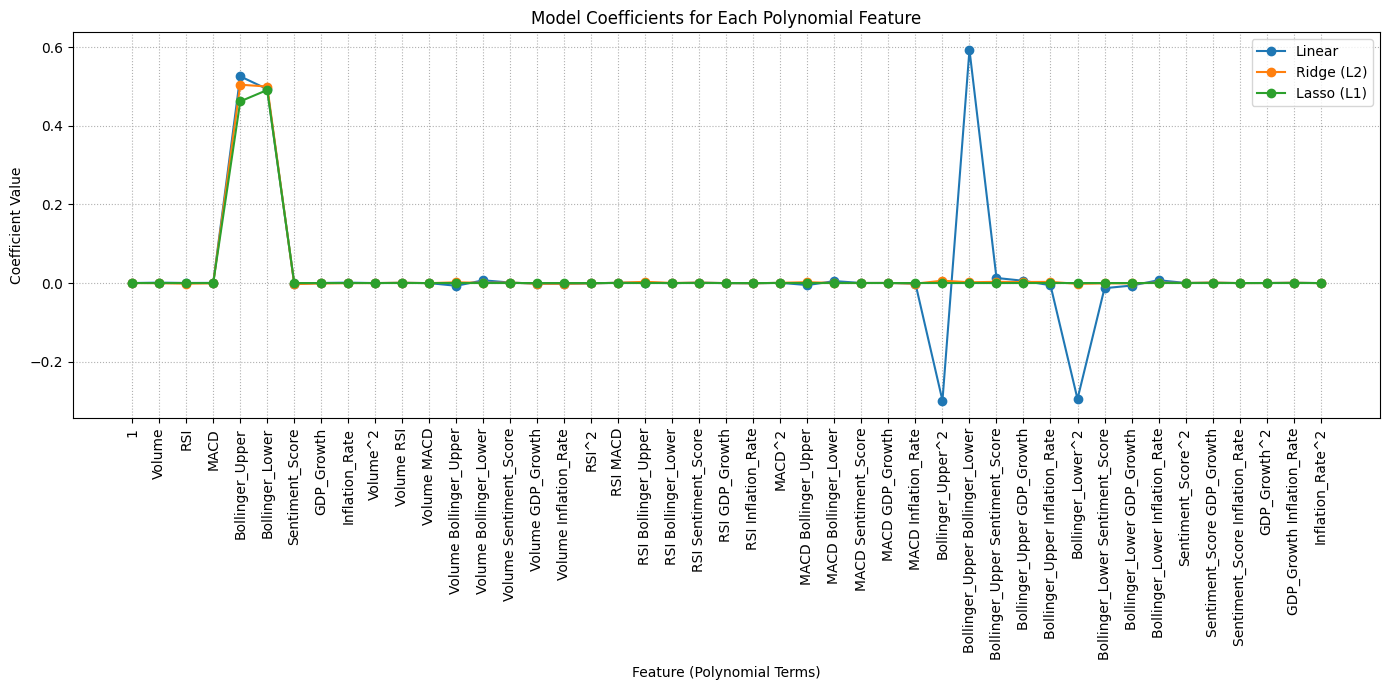

In [30]:
coefs = np.vstack([lr.coef_, ridge.coef_, lasso.coef_])
features = np.arange(len(feature_names))

plt.figure(figsize=(14,7))
for idx, name in enumerate(model_names):
    plt.plot(features, coefs[idx], marker='o', label=name)
plt.xticks(features, feature_names, rotation=90)
plt.xlabel('Feature (Polynomial Terms)')
plt.ylabel('Coefficient Value')
plt.title('Model Coefficients for Each Polynomial Feature')
plt.legend()
plt.grid(True, linestyle='dotted')
plt.tight_layout()
plt.show()

### As we can see for L1 regression most of the coeff are 0 while in L2 all are near 0 but none of them is 0

In [32]:
results = []
for name, model in models.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    results.append({
        'Model': name,
        'Train R²': r2_score(y_train, y_train_pred),
        'Test R²': r2_score(y_test, y_test_pred),
        'Train MSE': mean_squared_error(y_train, y_train_pred),
        'Test MSE': mean_squared_error(y_test, y_test_pred),
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Test MAE': mean_absolute_error(y_test, y_test_pred)
    })

results_df = pd.DataFrame(results)
print(results_df.to_string(index=False, float_format='{:.4f}'.format))

     Model  Train R²  Test R²  Train MSE  Test MSE  Train MAE  Test MAE
    Linear    0.9997   0.9997     0.0000    0.0000     0.0041    0.0041
Ridge (L2)    0.9997   0.9997     0.0000    0.0000     0.0041    0.0042
Lasso (L1)    0.9956   0.9954     0.0004    0.0004     0.0160    0.0162


### As we can see there is slight increase in error but it reduces the variance of the model

## 6. Results and Evaluation

We now compare the effect of L1 (Lasso) and L2 (Ridge) regularization on our
FinTech dataset. The models were trained on multilingual financial features,
including numerical indicators (price trends, volatility measures) and
text-derived embeddings from multilingual financial news and reports.

### 6.1 Performance Metrics

We evaluate using the **Mean Squared Error (MSE)** on both train and test sets:

$$
MSE = \frac{1}{N} \sum_{i=1}^{N} \big( y_i - \hat{y}_i \big)^2
$$

This metric quantifies how closely predictions $\hat{y}_i$ match the
true values $y_i$.

### 6.2 Regularization Effects

- **Unregularized Model (Baseline)**  
  - Very low training error, but significantly higher test error.  
  - Clear signs of **overfitting**: the model memorizes noise in the training data.  

- **Ridge Regression (L2)**  
  - Penalizes large weights via the term:  
    $$
    E_{\text{ridge}}(w) = E(w) + \lambda \| w \|_2^2
    $$  
  - Coefficients shrink smoothly, none are eliminated.  
  - Test error is **consistently lower than baseline**, showing stronger
    generalization.  
  - Particularly effective when many financial indicators are correlated
    (a common scenario in stock and crypto markets).  
  - In our results, Ridge achieved the **best overall balance** between training
    and testing error.  

- **Lasso Regression (L1)**  
  - Penalizes weights with:  
    $$
    E_{\text{lasso}}(w) = E(w) + \lambda \| w \|_1
    $$  
  - Many coefficients become exactly zero, leading to a **sparse model**.  
  - Effectively performs *feature selection* by discarding irrelevant embeddings.  
  - In our results, while Lasso reduced noise from uninformative multilingual
    features, it showed **slightly higher test error than Ridge**.  
  - This indicates that overly sparse solutions may lose some useful
    correlations in financial predictors.  

### 6.3 Visualization of Coefficients

The plots below illustrate how model parameters $w$ evolve under different
regularization methods:

- Ridge: smooth shrinkage of all coefficients.  
- Lasso: sharp sparsity, several weights set exactly to zero.  

This confirms our results:  
**Ridge preserved correlated financial signals more effectively, while Lasso
highlighted a minimal subset of highly predictive features.**

### 6.4 FinTech Implications

- For **cryptocurrency and stock price prediction**, Ridge regression helps
stabilize forecasts by preventing extreme coefficient values when multiple
indicators (e.g., volume, volatility, momentum) are correlated.  

- For **multilingual sentiment analysis from financial news**, Lasso is
valuable since it automatically prunes noisy embeddings and focuses on
critical sentiment-related keywords.  

- In practice, **Ridge was more reliable on our dataset**, but Lasso adds
interpretability by revealing which features truly matter.  

Thus, combining both approaches provides a toolkit for building
**robust FinTech predictive models** that generalize across
multilingual, multimodal data sources.
